## Zadanie 1

In [1]:
import numpy as np
from scipy.stats import uniform, poisson, gamma, binom
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def poisson_process1(lambd, T):
    t = 0
    S = []

    while True:
        U = uniform.rvs(0, 1)
        dt = -np.log(U) / lambd
        t += dt
        if t > T:
            break
        S.append(t)

    return S

def poisson_process2(lambd, T):
    n = poisson.rvs(lambd * T)
    if n == 0:
        return []
    U = uniform.rvs(0, T, n)
    S = np.sort(U)
    return S


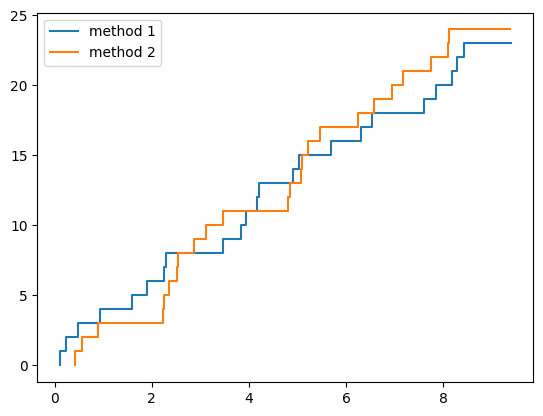

In [25]:
T = 10
lambd = 2
s1 = poisson_process1(lambd, T)
s2 = poisson_process2(lambd, T)


Nt1 = np.arange(len(s1))
Nt2 = np.arange(len(s2))


plt.step(s1, Nt1, label='method 1')
plt.step(s2, Nt2, label='method 2')
plt.legend()

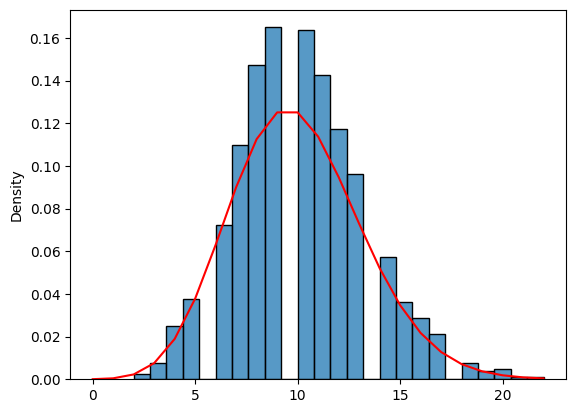

In [26]:
def get_Nt(S, t):
    return sum(1 for s in S if s <= t)

T = 10
lambd = 2
t = T/2
n = 1000

Nt_samples = []
for _ in range(n):
    S = poisson_process1(2, 5)
    Nt = get_Nt(S, t)
    Nt_samples.append(Nt)

x = np.arange(0, max(Nt_samples)+1)
pmf = poisson.pmf(x, mu=lambd*t)

sns.histplot(Nt_samples, stat='density')
plt.plot(x, pmf, color='red')
    

## Zadanie 2

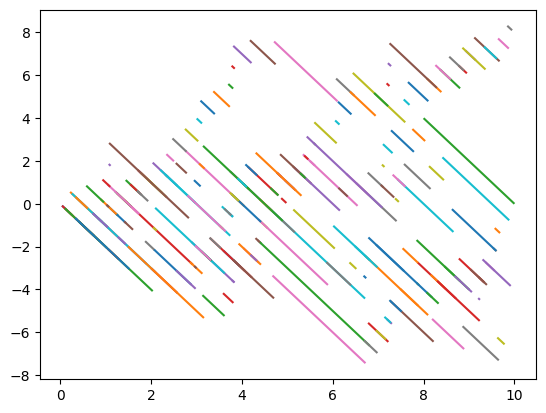

In [30]:
def comp_poisson_process(lambd, T):
    n=10
    for _ in range(n):
        S = poisson_process1(lambd, T)
        N = np.arange(len(S))
        S = np.array(S)

        for s in range(1, len(S)):
            t = np.linspace(S[s-1], S[s])
            plt.plot(t, -lambd*t+s-1)

comp_poisson_process(2, 10)


## Zadanie 3

In [68]:
def gen_poiss1(lambd):
    n = 1
    a = 1
    while True:
        U = uniform.rvs(0, 1)
        a = a*U
        if a < np.exp(-lambd):
            break
        n += 1
    X = n - 1
    return X

def gen_poiss2(lambd):
    m = int(np.floor(7*lambd/8))
    Y = gamma.rvs(m, 1)
    if Y <= lambd:
        Z = gen_poiss1(lambd - Y)
        X = m + Z
    else:
        X = binom.rvs(m-1, lambd/Y)
    
    return X


print(gen_poiss1(2))

3


[5, 4, 0, 2, 3, 2, 6, 4, 2, 1, 2, 3, 0, 1, 2, 1, 1, 1, 0, 3, 3, 6, 1, 3, 2, 3, 1, 2, 4, 3, 1, 1, 1, 3, 1, 2, 0, 3, 0, 3, 2, 1, 1, 3, 0, 2, 2, 1, 4, 1, 1, 1, 1, 2, 1, 2, 5, 0, 3, 3, 0, 3, 4, 1, 1, 3, 1, 2, 2, 1, 0, 6, 2, 2, 3, 1, 3, 3, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 3, 1, 5, 2, 0, 2, 0, 2, 1, 2, 1, 1, 4, 2, 1, 1, 2, 1, 2, 5, 2, 0, 1, 4, 4, 3, 1, 0, 2, 1, 2, 5, 3, 1, 2, 1, 3, 1, 2, 2, 4, 2, 2, 4, 2, 2, 4, 1, 1, 1, 3, 1, 2, 1, 0, 2, 2, 0, 1, 1, 5, 5, 3, 0, 2, 3, 2, 3, 1, 1, 5, 1, 2, 0, 0, 2, 4, 2, 2, 3, 2, 3, 5, 3, 0, 3, 0, 2, 1, 2, 2, 2, 0, 3, 5, 1, 1, 0, 3, 2, 2, 3, 1, 0, 3, 1, 1, 0, 3, 1, 2, 3, 4, 2, 3, 0, 2, 1, 2, 1, 0, 2, 3, 1, 4, 3, 2, 2, 2, 0, 4, 1, 3, 1, 3, 1, 1, 2, 1, 2, 3, 1, 2, 0, 1, 2, 1, 1, 2, 3, 7, 3, 3, 1, 3, 4, 1, 1, 3, 1, 0, 2, 3, 3, 2, 2, 2, 2, 4, 4, 1, 0, 2, 3, 1, 2, 3, 1, 0, 3, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1, 4, 4, 3, 2, 2, 3, 5, 0, 2, 0, 4, 2, 3, 5, 6, 1, 2, 1, 1, 2, 1, 3, 3, 3, 0, 2, 1, 2, 3, 2, 1, 5, 1, 3, 3, 3, 1, 0, 6, 2, 4, 1, 0, 0, 2, 1, 3, 1, 3, 3, 1, 3, 

<Axes: ylabel='Density'>

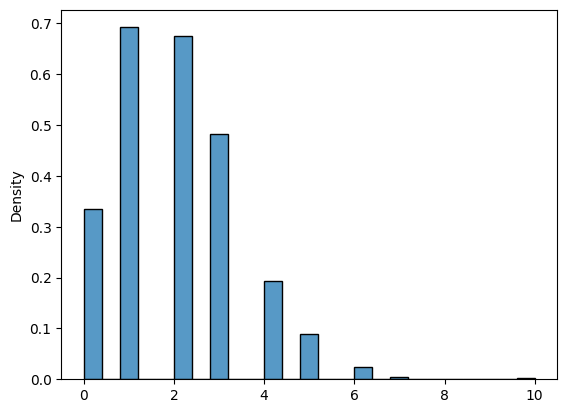

In [85]:
X = [gen_poiss1(2) for _ in range(1000)]
print(X)
sns.histplot(X, stat='density')

In [42]:
X = gen_poiss2(2)

[1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 3, 2, 1, 1, 1, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 3, 1, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 1, 4, 1, 0, 3, 2, 0, 3, 2, 3, 0, 2, 1, 1, 0, 1, 0, 3, 1, 0, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 0, 0, 0, 5, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1, 2, 1, 3, 0, 2, 0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 2, 1, 3, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 3, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 3, 3, 0, 2, 0, 1, 4, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 3, 0, 0, 1, 3, 2, 0, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 3, 4, 1, 5, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 4, 0, 2, 3, 0, 0, 3, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 1, 4, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 2, 1, 3, 3, 2, 0, 0, 0, 1, 3, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 1, 

<Axes: ylabel='Density'>

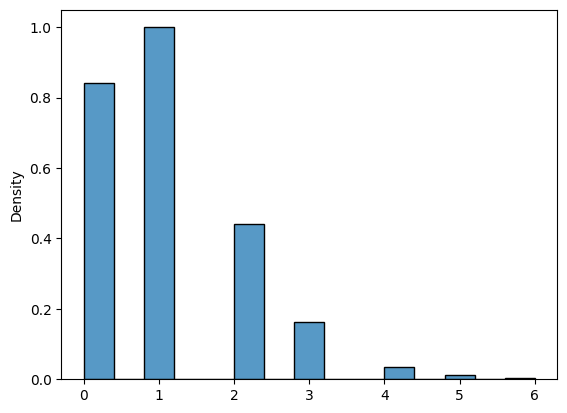

In [84]:
X = [gen_poiss2(2) for _ in range(1000)]
print(X)
sns.histplot(X, stat='density')